Auto Regression (From Wikipedia :https://en.wikipedia.org/wiki/Autoregressive_model ):

The autoregressive model specifies that the output variable depends linearly on its **own previous values ** and on a stochastic term 

So we just need 2 columns, a time column and its value column

In [0]:
from google.colab import drive
drive.mount("/content/drive",force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import pandas as pd
import matplotlib.pylab as plt
from sklearn import preprocessing

In [0]:
dataset= pd.read_csv('/content/drive/My Drive/Datasets: Cyber/Uncensored/ICMP.csv')

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (20) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [0]:
li=[]
for i in dataset:
  li.append(i)

In [0]:
dataset.head()

In [0]:
dataset['Date']=pd.to_datetime(dataset['Date'])

In [0]:
li.remove("Date")
li.remove("Class")

In [0]:
dataset=dataset.drop(li,axis=1)

In [0]:
dataset.head()

,Date,Class
0,2017-12-03 15:23:00,ICMPFlood
1,2017-12-03 15:23:00,ICMPFlood
2,2017-12-03 15:23:00,ICMPFlood
3,2017-12-03 15:23:00,ICMPFlood
4,2017-12-03 15:23:00,ICMPFlood


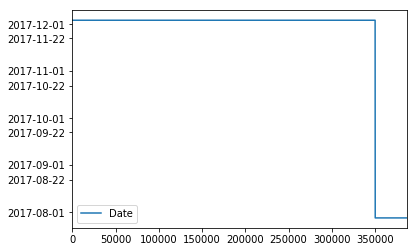

In [0]:
dataset.plot()

In [0]:
le=preprocessing.LabelEncoder()
le.fit(dataset["Class"])
dataset["Class"]=le.transform(dataset["Class"])

In [0]:
dataset["stationary"]=dataset["Class"].diff()

In [0]:
from statsmodels.tsa.ar_model import AR
X = dataset['stationary'].dropna()
train_data = X[1:len(X)-12]
test_data = X[X[len(X)-12:]]
 
#train the autoregression model
model = AR(train_data)
model_fitted = model.fit()

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [0]:

print('The lag value chose is: %s' % model_fitted.k_ar)
 

The lag value chose is: 95


In [0]:
print('The coefficients of the model are:\n %s' % model_fitted.params)

The coefficients of the model are:
 const             0.000003
L1.stationary    -0.000003
L2.stationary    -0.000003
L3.stationary    -0.000003
L4.stationary    -0.000003
L5.stationary    -0.000003
L6.stationary    -0.000003
L7.stationary    -0.000003
L8.stationary    -0.000003
L9.stationary    -0.000003
L10.stationary   -0.000003
L11.stationary   -0.000003
L12.stationary   -0.000003
L13.stationary   -0.000003
L14.stationary   -0.000003
L15.stationary   -0.000003
L16.stationary   -0.000003
L17.stationary   -0.000003
L18.stationary   -0.000003
L19.stationary   -0.000003
L20.stationary   -0.000003
L21.stationary   -0.000003
L22.stationary   -0.000003
L23.stationary   -0.000003
L24.stationary   -0.000003
L25.stationary   -0.000003
L26.stationary   -0.000003
L27.stationary   -0.000003
L28.stationary   -0.000003
L29.stationary   -0.000003
                    ...   
L66.stationary   -0.000003
L67.stationary   -0.000003
L68.stationary   -0.000003
L69.stationary   -0.000003
L70.stationary   -0

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:576: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


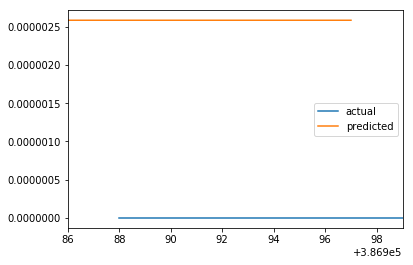

In [0]:
predictions = model_fitted.predict(
    start=len(train_data), 
    end=len(train_data) + len(test_data)-1, 
    dynamic=False)
 
# create a comparison dataframe
compare_df = pd.concat(
    [dataset['stationary'].tail(12),
    predictions], axis=1).rename(
    columns={'stationary': 'actual', 0:'predicted'})
 
#plot the two values
compare_df.plot()